In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import lib
import myPlot
import neuron

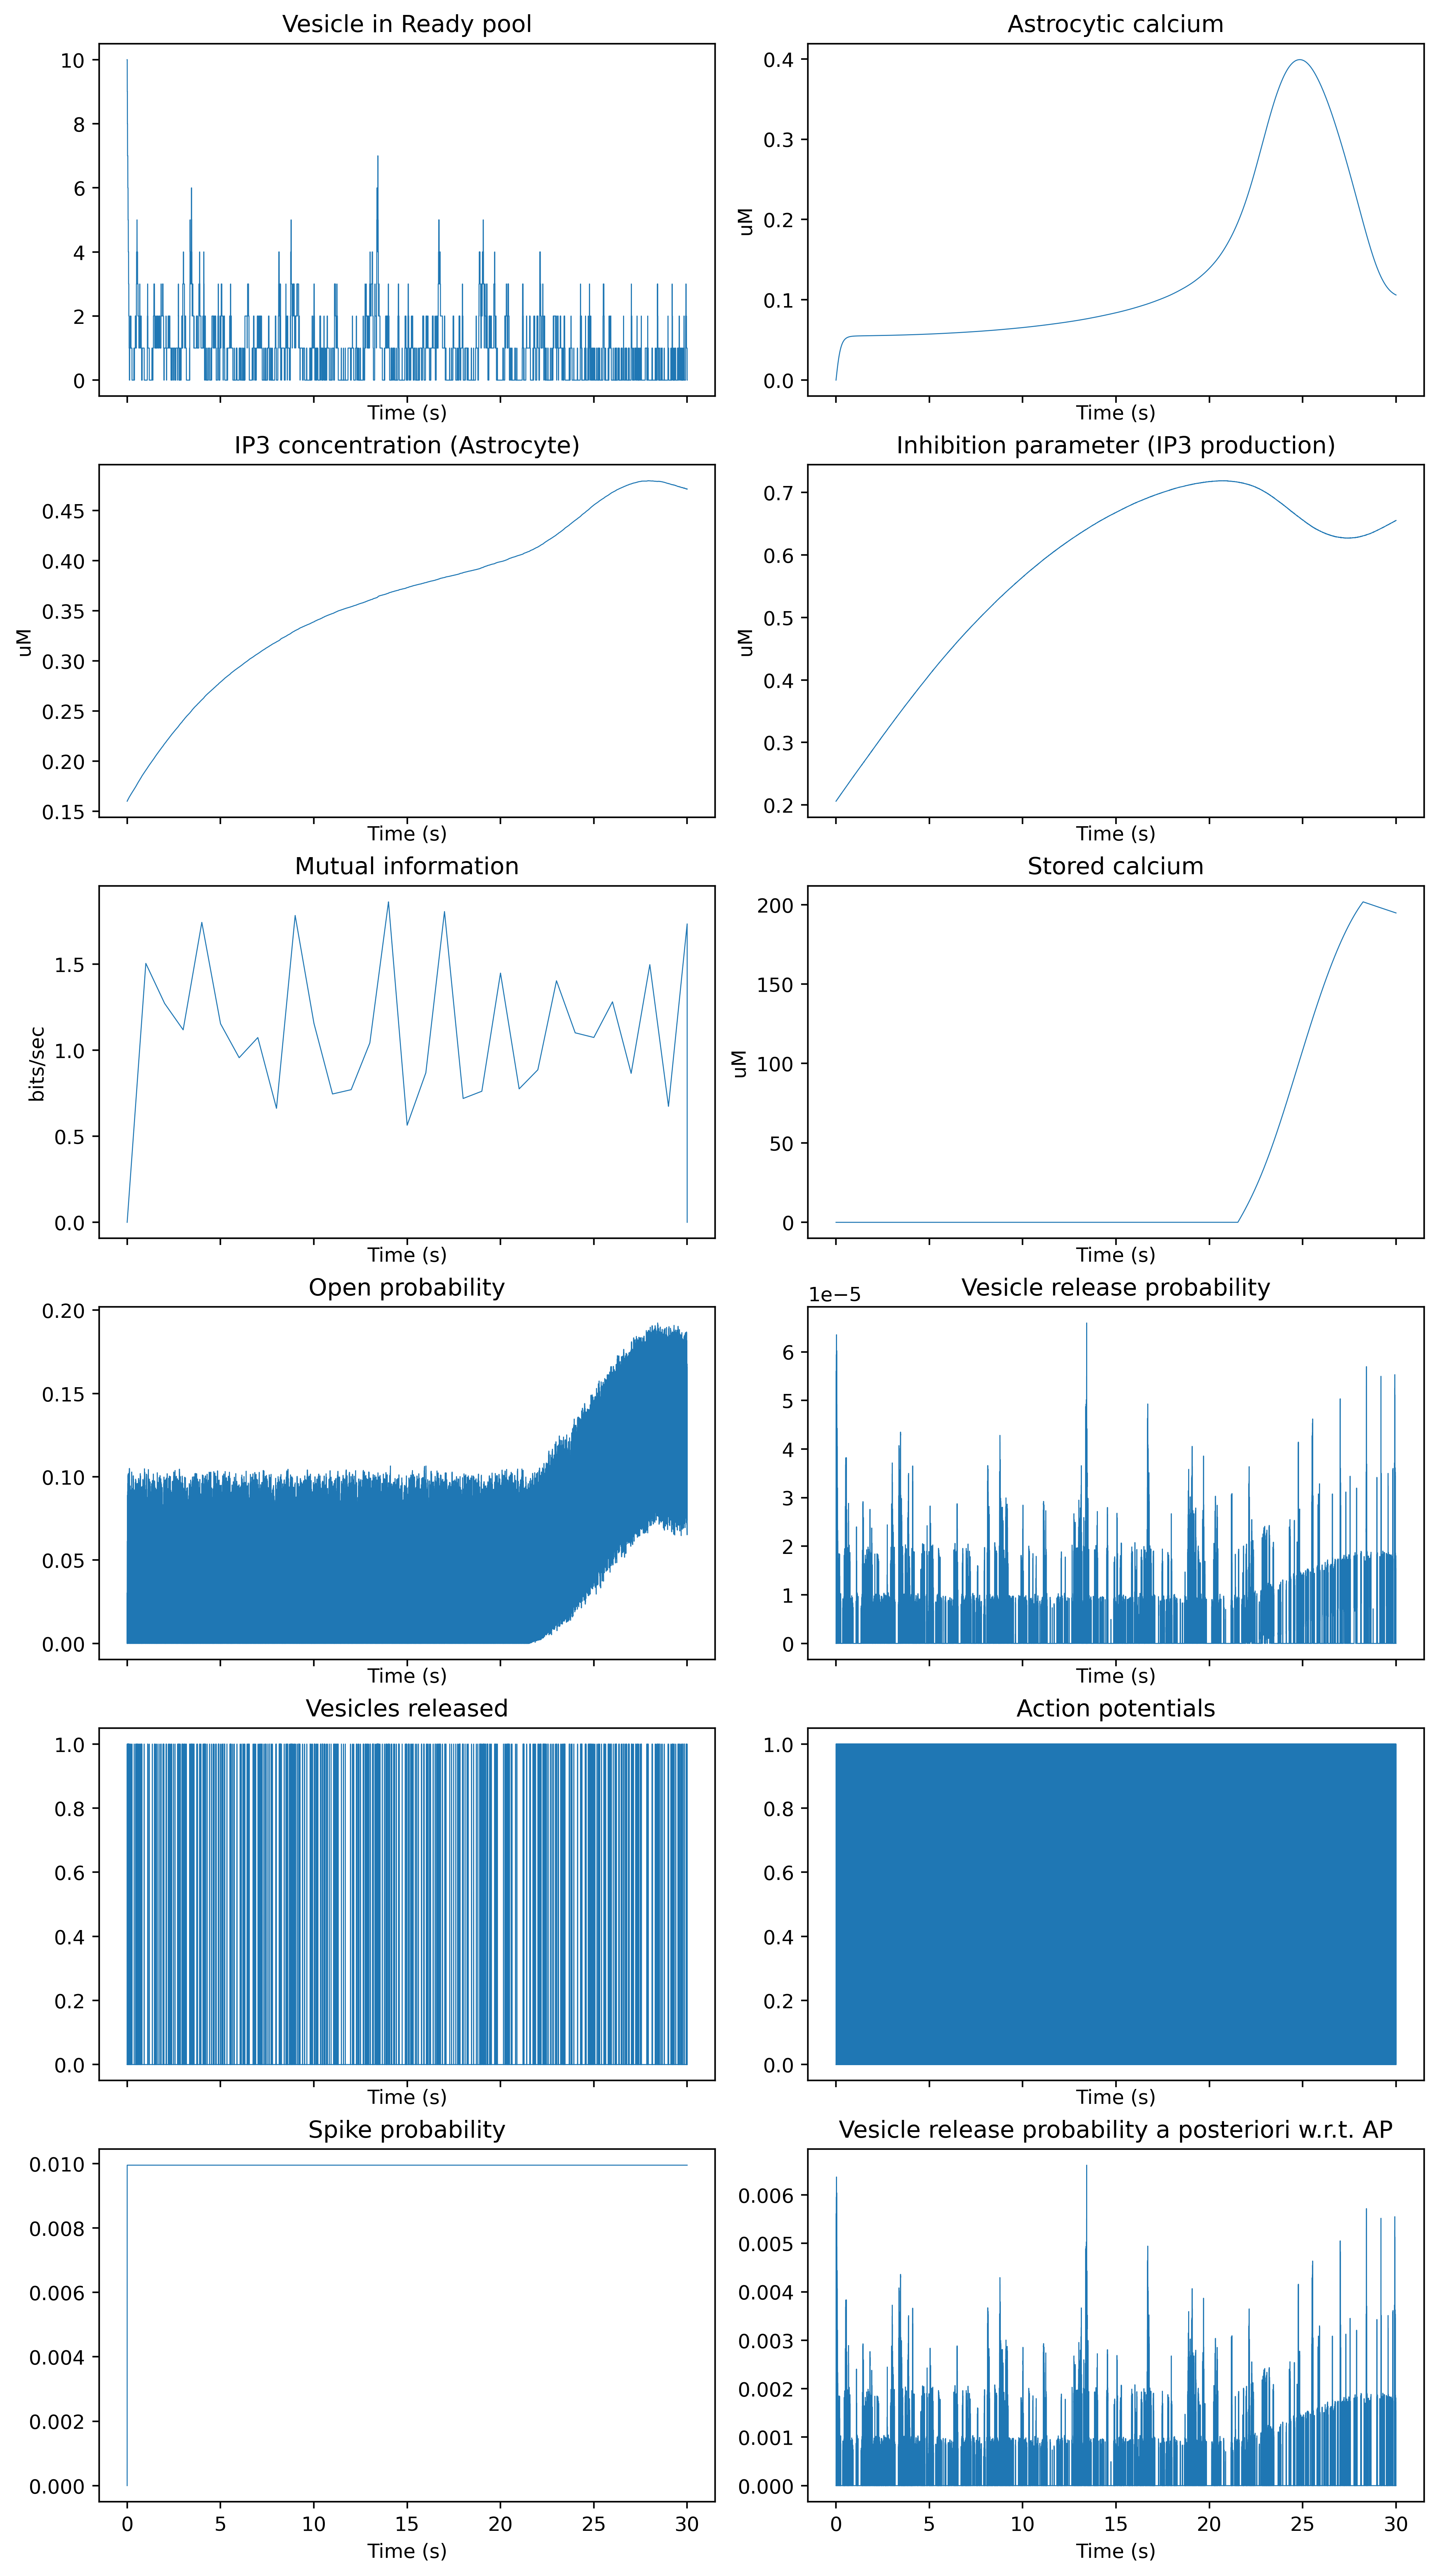

Average number of APs: 7461.0 (248.7 Hz)
Average number of vesicle releases: 508.0 (16.9 Hz)
Average mutual information: 1.1142 bit/s


'my_neuron2 = neuron.Simulator(properties, simulation_parameters, noise)\nmy_neuron2.s.DiffEq = False\n\nresults = my_neuron2.simulate(track_variables, save=True, save_each=1)\n\n#myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables))\nsetProva = (20, 200, 500)#(2, 5, 10, 27)\naggregate = None\nlabels = []\nfor lambda_ in setProva:\n    simulation_parameters.lambda_ = lambda_#properties.N_v_max = N_max\n    my_neuron = neuron.Simulator(properties, simulation_parameters, noise)\n    results = my_neuron.simulate(track_variables, save=True, save_each=1)\n    myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables))\n    if (aggregate == None):\n        aggregate = results\n    else:\n        aggregate = aggregate.group(results)\n    labels.append("λ=" + str(lambda_))\n\nmyPlot.drawFigure(SIMULATION_TIME, TIME_STEP, aggregate, n_drawings=len(track_variables), n_plots=len(setProva), labels=labels)'

In [6]:
importlib.reload(myPlot)
importlib.reload(lib)
importlib.reload(neuron)
np.seterr(all='raise', under="warn")

SIMULATION_TIME = 30
TIME_STEP = 0.02e-3 #s

time_window_plot = 0, 20 #s

properties = neuron.Properties(
    membrane_tau = 20e-3,
    spike_duration = 2e-3,
    C = 1e-6, #F/cm^2
    t_ref_s = 2e-3, # absolute refractary period after one AP
    t_ref_v = 6.3e-3, # absolute refractary period of release vesicle machinery
    LTP_active = True,   # set to False to inactivate astrocytic feedback
    threshold = -34.3e-3, # V
    Urest = -62.5e-3,  #V
    Threshold_rest = -48.9e-3,
    hyperp_v = -74.7e-3,
    hyperp_tau = 80e-3,
    N_v_max = 10,
    glutamate_clearance_time=2e-3
)

simulation_parameters = neuron.SimulationParameters(
    time_step = TIME_STEP,
    simulation_time = SIMULATION_TIME,
    temperature = 310, #K
    #DiffEq=False,
    current_type = "fixed_rate",
    current_amplitude = 1.5e-6,
    f_current = 500, #Hz
    N_iterations = 1
)

noise = neuron.Noise(
    thermal = False,
    axonal = False,
    AP_width_CV = 0.06,
    escape = True,
    spontaneous_release = True
)

my_neuron = neuron.Simulator(properties, simulation_parameters, noise)

track_variables= ["N_v", "Ca_Astro", "IP3", "h", "mutual_information", "Ca_stored", "open_prob", 
"release_prob", "release_vector", "S", "spike_probability", "release_prob_a_posteriori"]
""" ["u", "spike_rate", "spike_probability", "open_prob", "S", "release_rate", "release_vector",
 "N_v", "release_prob", "release_prob_a_posteriori", "ap_duration_count", "Ca_pre", "Ca_Astro" ,"Ca_stored", 
 "site_probabilities", "glu", "IP3", "h", "mutual_information"]"""

#results = my_neuron.simulate(track_variables, save=True, save_each=1)
#results.release_prob.averageEach(30000)

#myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables))
                  #, time_window=time_window_plot)
#myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables), time_window=time_window_plot)

"""my_neuron2 = neuron.Simulator(properties, simulation_parameters, noise)
my_neuron2.s.DiffEq = False

results = my_neuron2.simulate(track_variables, save=True, save_each=1)"""

#myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables))
setProva = (20, 200, 500)#(2, 5, 10, 27)
aggregate = None
labels = []
for lambda_ in setProva:
    simulation_parameters.lambda_ = lambda_#properties.N_v_max = N_max
    my_neuron = neuron.Simulator(properties, simulation_parameters, noise)
    results = my_neuron.simulate(track_variables, save=True, save_each=1)
    myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables))
    if (aggregate == None):
        aggregate = results
    else:
        aggregate = aggregate.group(results)
    labels.append("λ=" + str(lambda_))

myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, aggregate, n_drawings=len(track_variables), n_plots=len(setProva), labels=labels)

In [17]:
# Save last figure
neuron.saveResults(simulation_parameters, properties, aggregate)


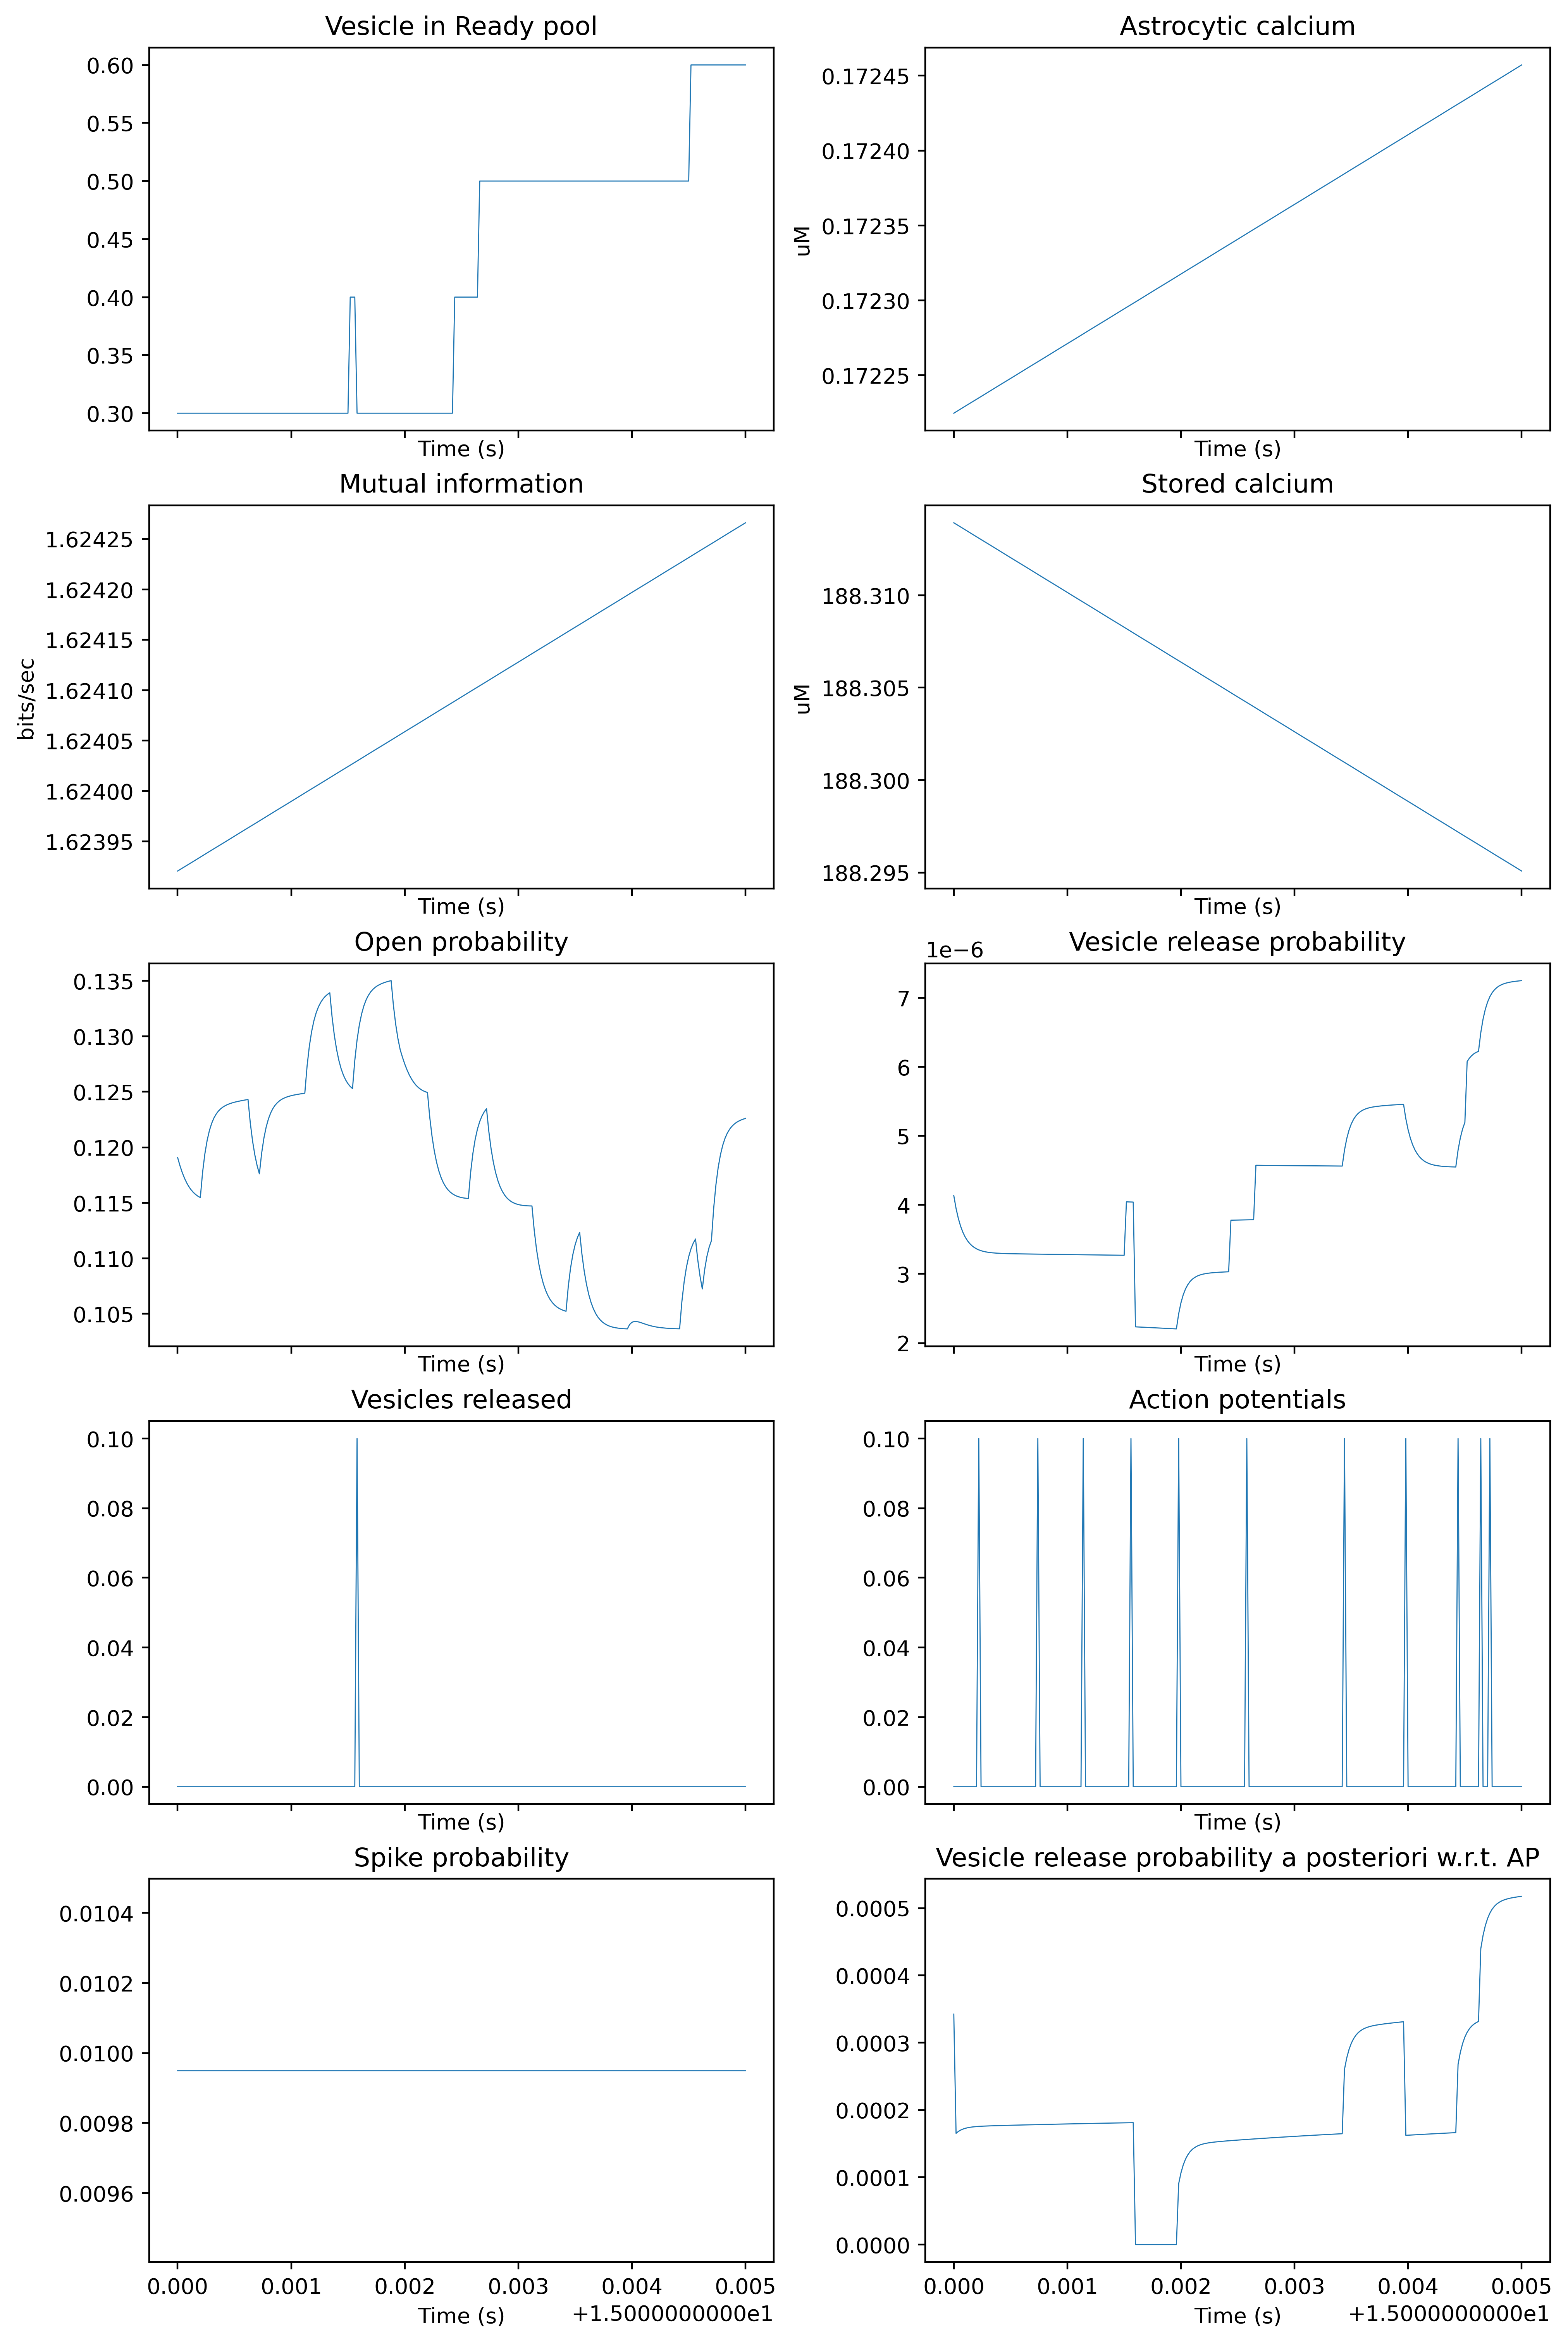

Average number of APs: 1.1 (0.1 Hz)
Average number of vesicle releases: 0.1 (0.0 Hz)
Average mutual information: 0.0004 bit/s


In [8]:
time_window_plot = 15, 15.005
myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables), time_window=time_window_plot)